In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("/content/creditcard.csv")

In [3]:
print("The data looks like :")
print(X.head())
print(X.columns)

The data looks like :
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

In [4]:
print(X.describe())
# data looks pretty normal , not much need to normalise
# and time and amount shouldnt be normalised I think

               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ...   
min     

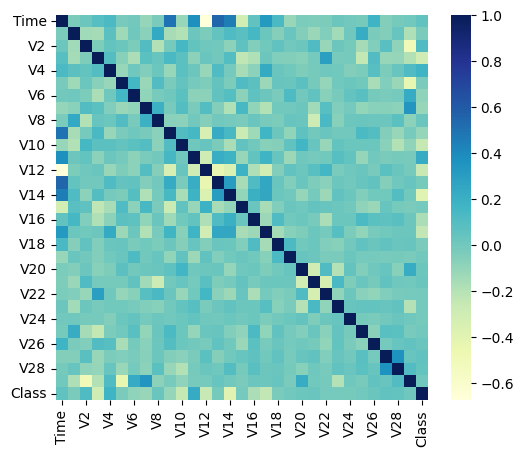

<Figure size 640x480 with 0 Axes>

In [5]:
# correlation heatmap
corrMatrix=X.corr()
sns.heatmap(data=corrMatrix, annot=False , cmap="YlGnBu")
plt.gcf().set_size_inches(6, 5)
plt.figure()
plt.show()

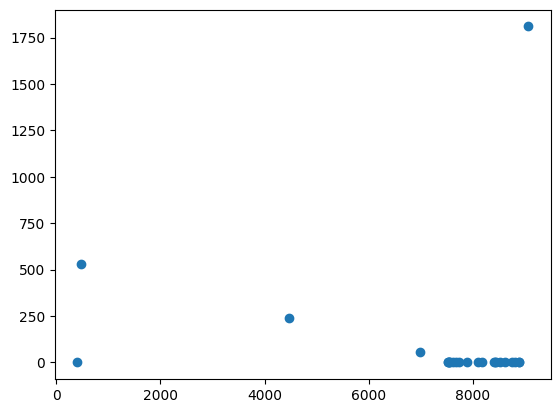

In [6]:
# plot of frauds with time
plt.scatter(x=X.loc[X['Class']==1]['Time'], y=X.loc[X['Class']==1]['Amount'])
plt.show()

<Figure size 75x50 with 0 Axes>

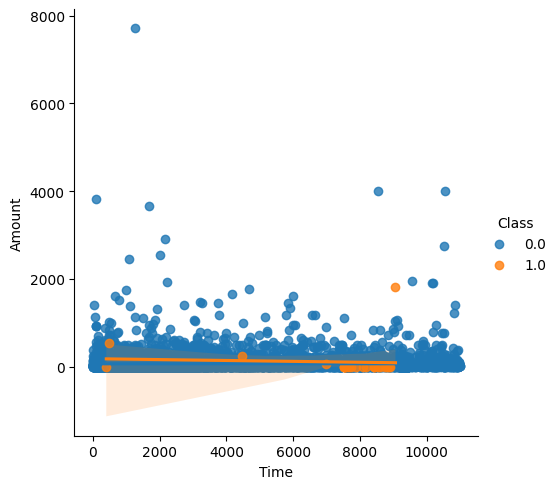

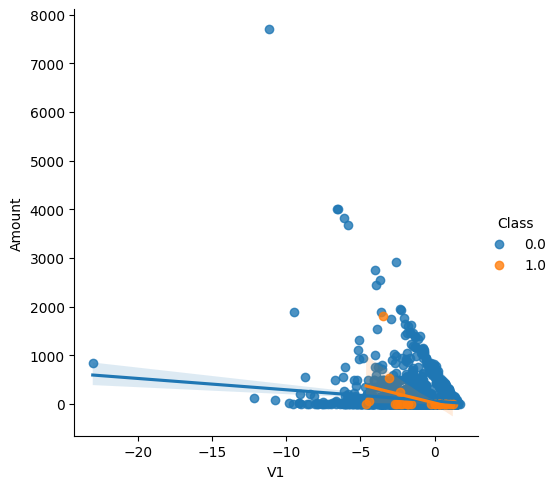

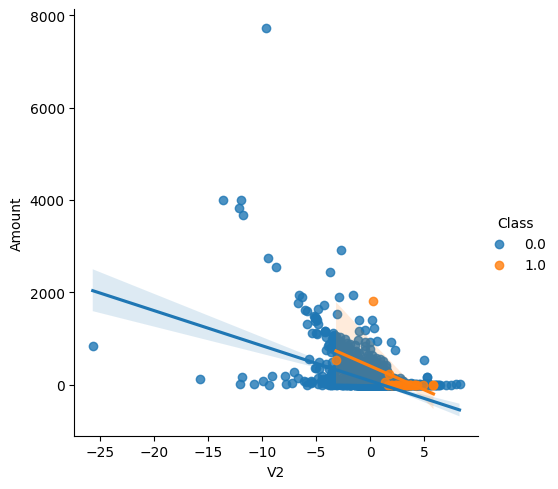

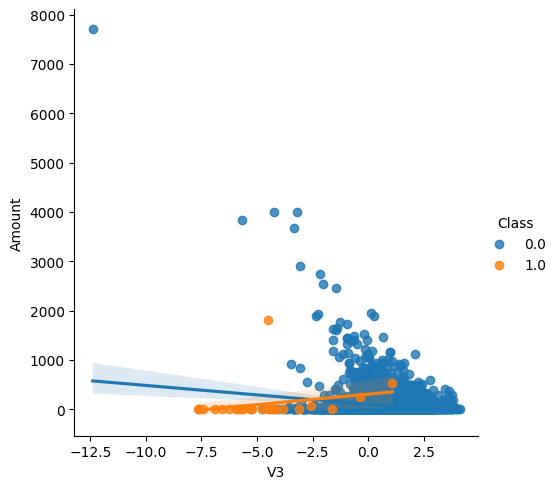

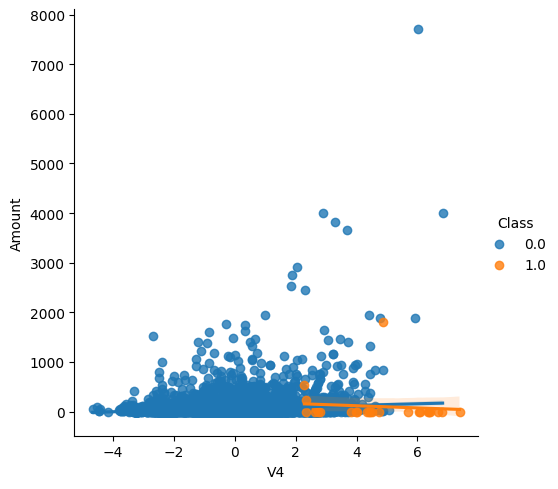

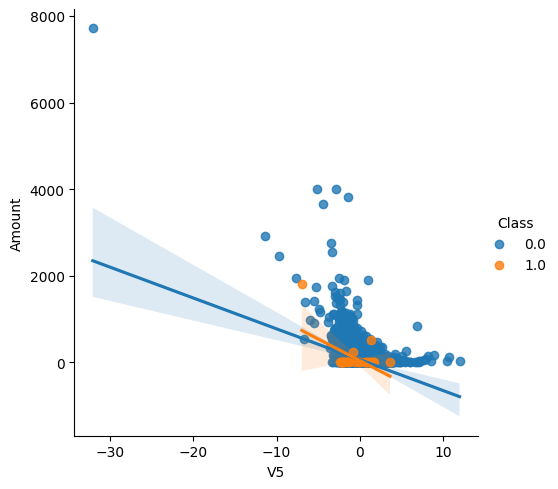

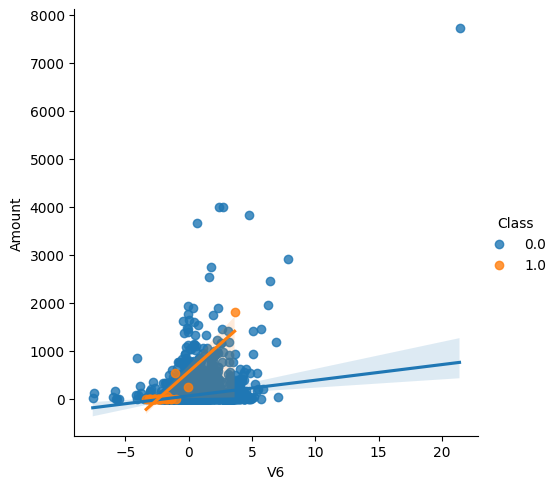

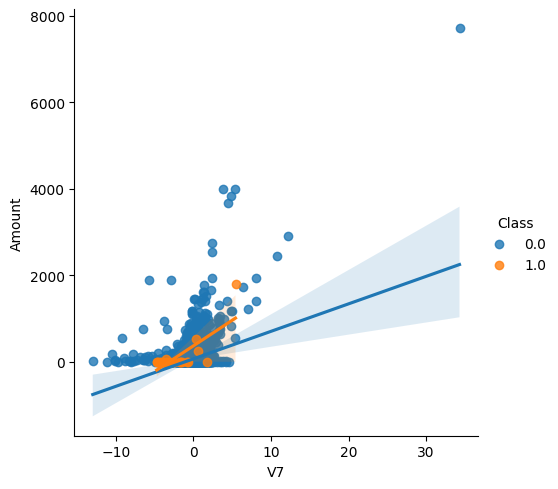

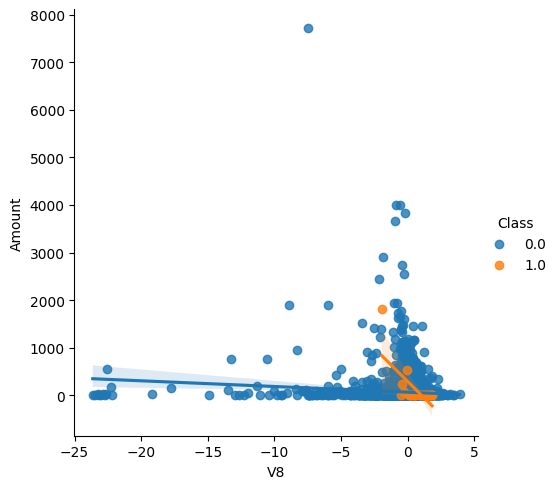

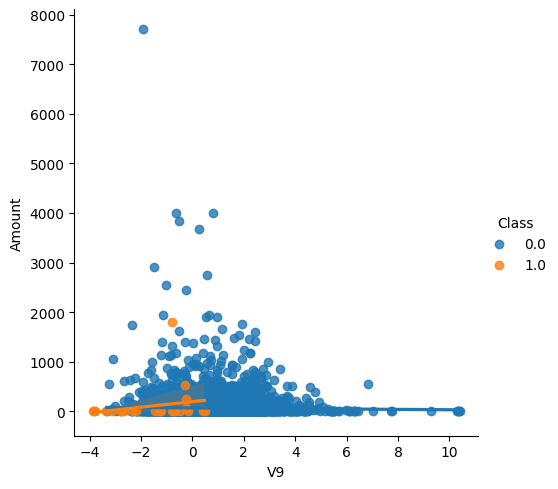

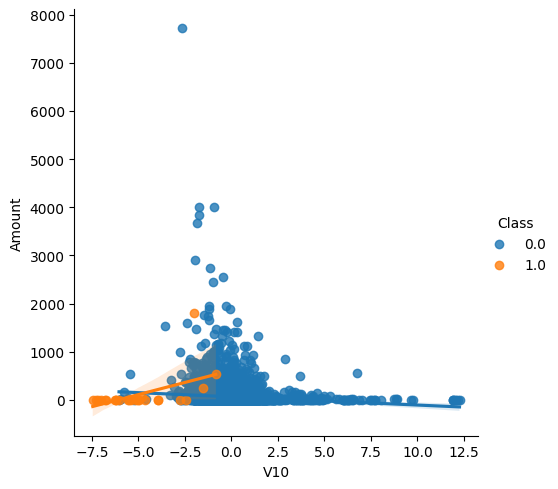

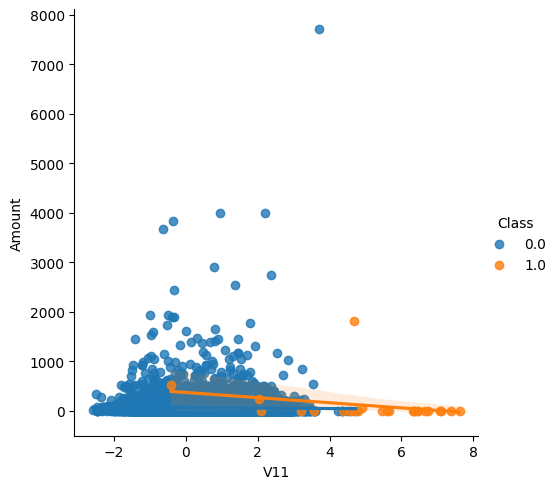

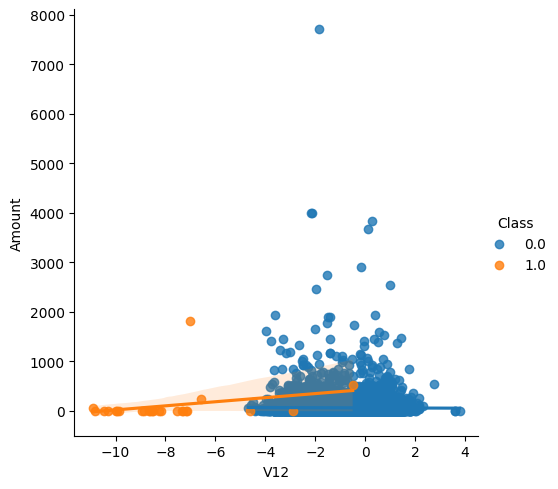

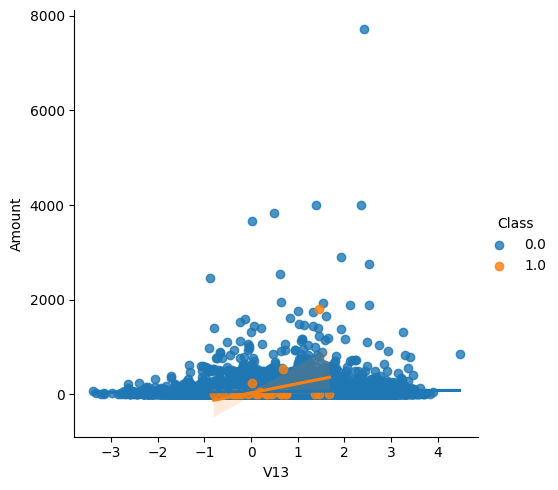

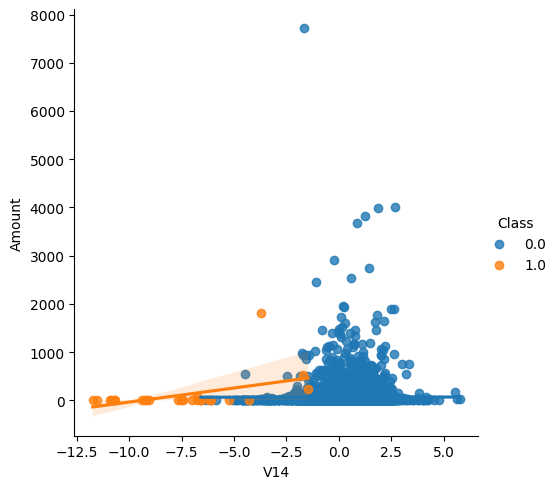

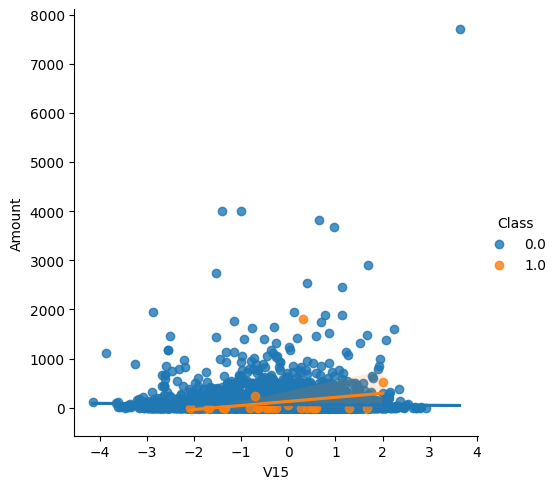

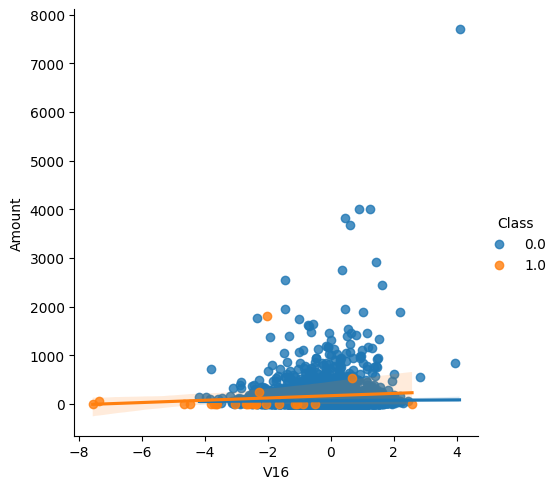

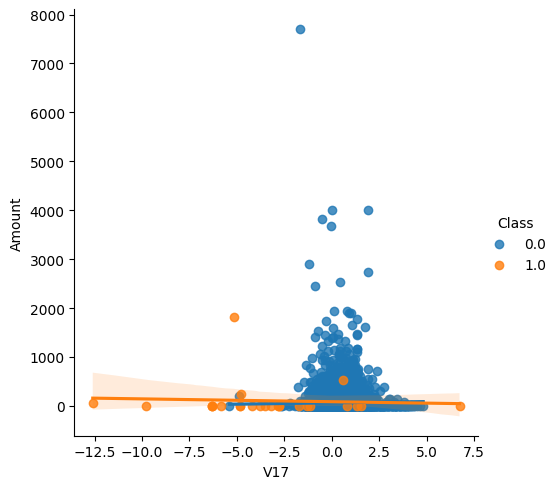

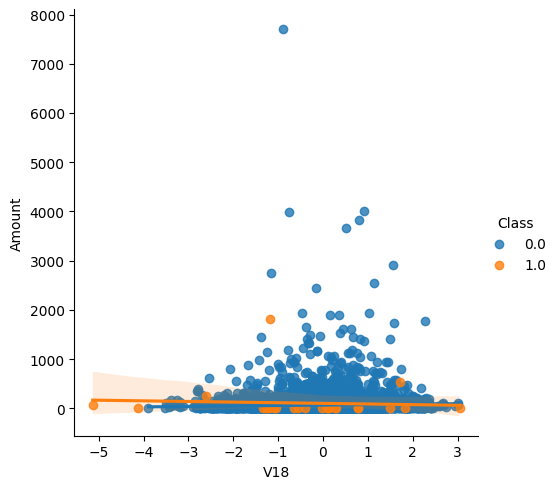

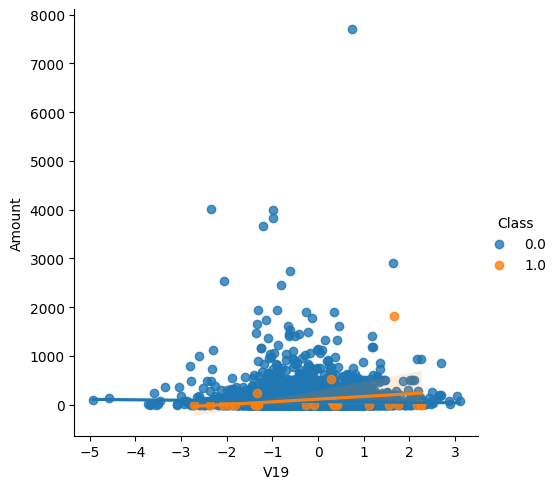

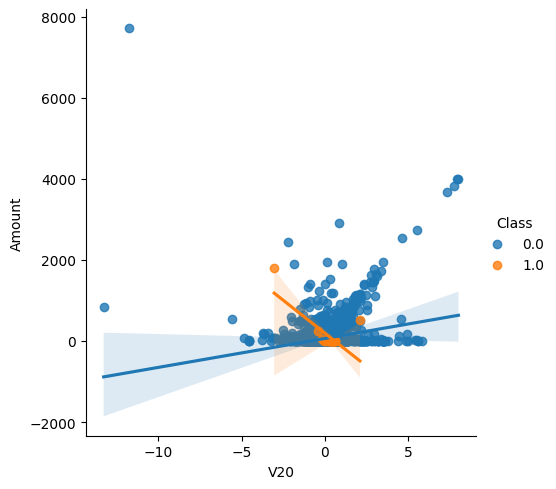

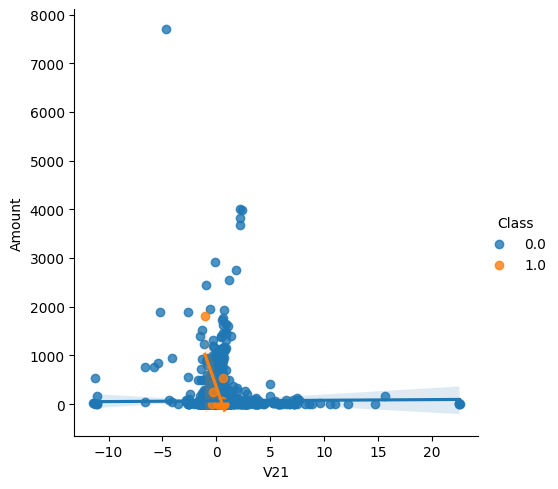

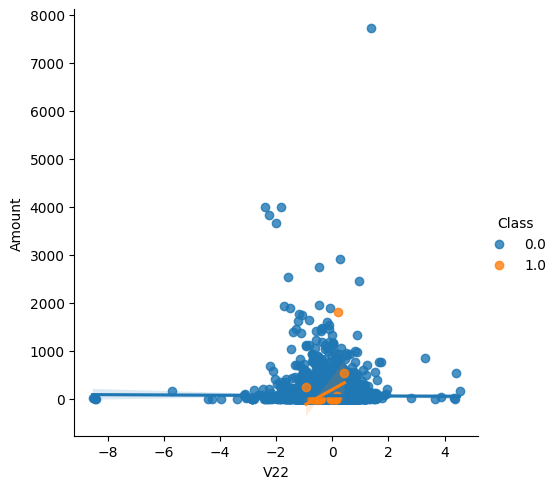

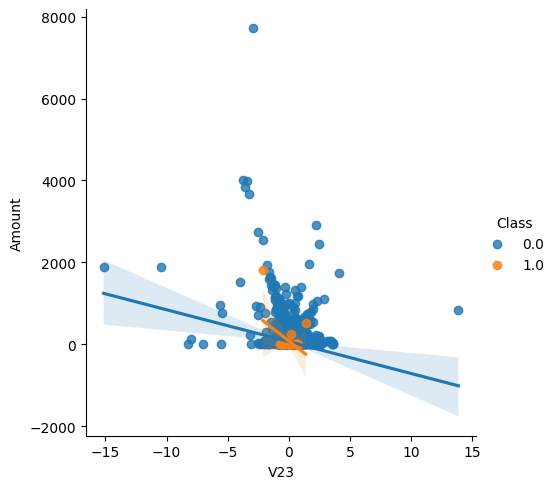

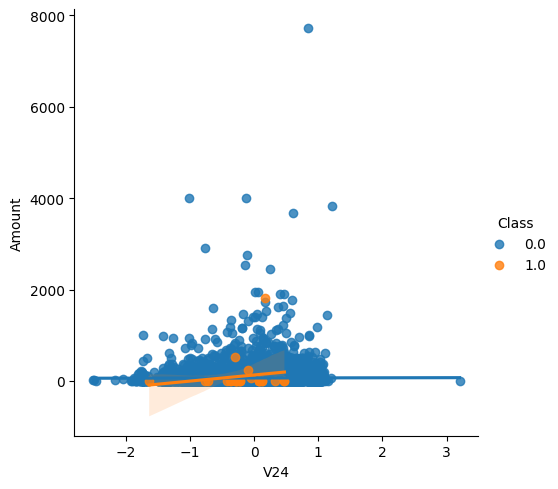

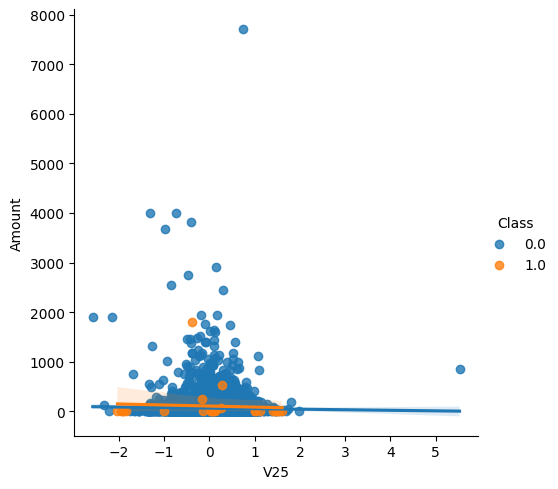

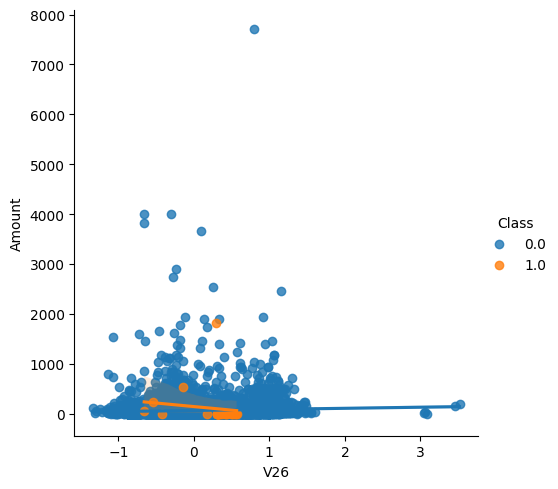

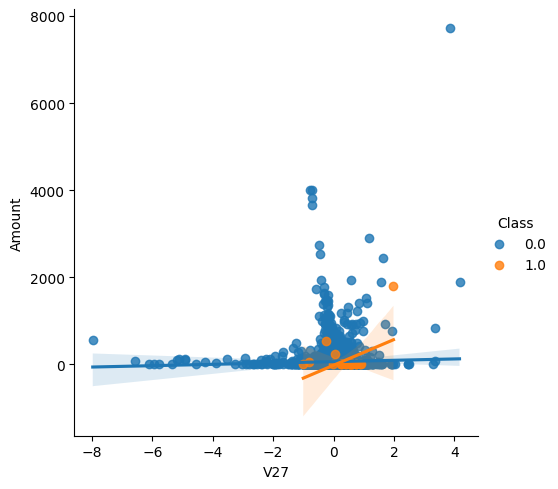

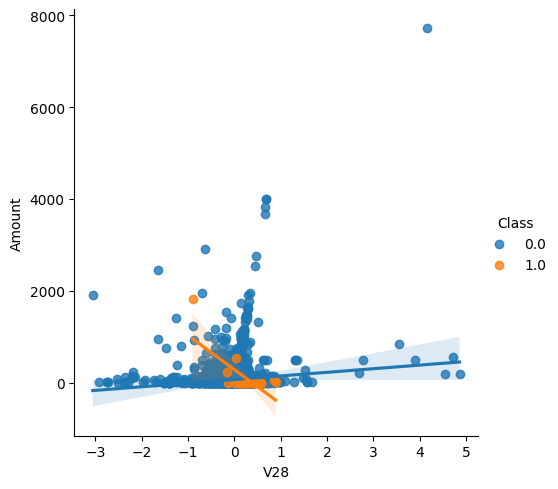

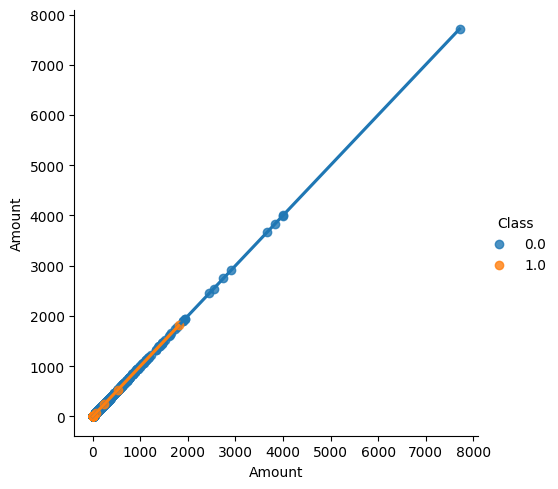

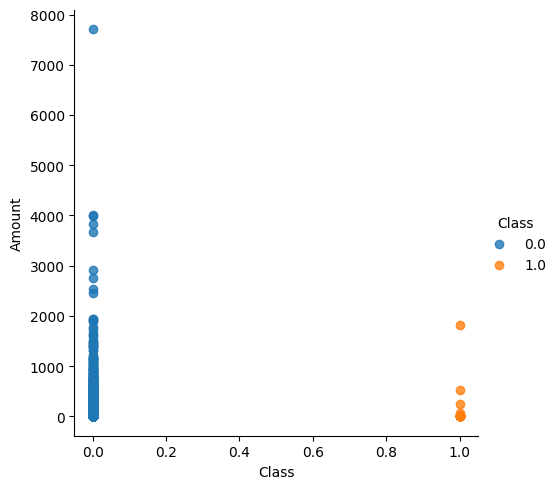

In [7]:
plt.gcf().set_size_inches(0.75, 0.5)
for col in X.columns:
  sns.lmplot(x=col, y='Amount', hue='Class', data=X)
  plt.show()

0.0    7947
1.0      25
Name: Class, dtype: int64




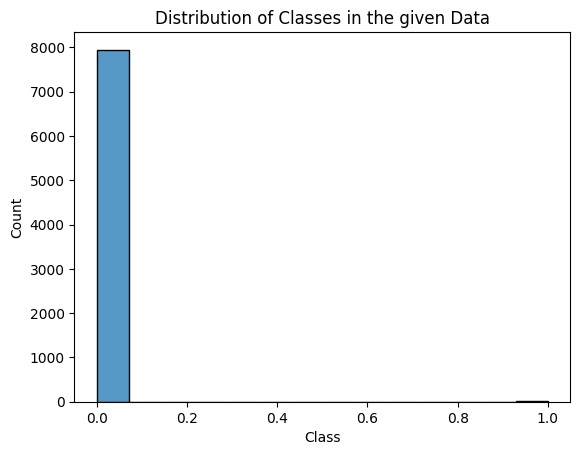

In [8]:
# value counts of class
sns.histplot(X['Class'])
plt.title("Distribution of Classes in the given Data")
print(X['Class'].value_counts())
print()
print()
plt.show()
# huge imbalance seen

In [9]:
# dividing X and y
y = X['Class']
X.drop(['Class'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [10]:
# using SMOTE
from imblearn.over_sampling import SMOTE
smote_1=SMOTE()
X_train,y_train= smote_1.fit_resample(X_train,y_train)


In [11]:
# logistic regression
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
# it wasnt converging for 100 iterations(the default value of the function) so had to set this manually
classifier = LogisticRegression(max_iter=150)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [15]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
pred_train = classifier.predict(X_train)
report_train = classification_report(y_train,pred_train)
print(report_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6360
         1.0       1.00      1.00      1.00      6360

    accuracy                           1.00     12720
   macro avg       1.00      1.00      1.00     12720
weighted avg       1.00      1.00      1.00     12720

